## Approach of Application Data Analysis

- Importing Module

- Reading the Dataset into Pandas Dataframe

- We have divided the features into small segments and anlyzed segment-wise using a smaller dataframe containing only relevant categories.

- Data Cleaning, Missing Data Handling, Type casting are done segment-wise.

- Plots and percentage wise Dafaulter calculation are done segment-wise as well.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
pd.set_option('max_rows',100000000)
pd.set_option('max_columns',100000000)

In [4]:
#Reading the DataSet
application_df= pd.read_csv("D:\Case Study I\\application_data.csv")
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
application_df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
application_df.shape

(307511, 122)

In [7]:
#function to find Missing Values 
def missing_per(df):
    missing_data=df.count()/len(df)
    missing_data=((1-missing_data)*100)
    missing=missing_data.sort_values(ascending=False)
    return missing

In [8]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
# Dropping columns where missing values are greater than 40%
null_percentage=missing_per(application_df)
high_missing_cols = null_percentage[null_percentage >= 40]
application_df = application_df.drop(columns = high_missing_cols.index)

In [10]:
application_df.shape

(307511, 73)

In [11]:
missing_per(application_df)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
NAME_INCOME_TYPE                0.000000
FLAG_OWN_REALTY                 0.000000
TARGET                          0.000000
FLAG_EMAIL                      0.000000
FLAG_PHONE                      0.000000
FLAG_CONT_MOBILE                0.000000
NAME_CONTRACT_TY

In [12]:
#OCCUPATION_TYPE                31.345545
#EXT_SOURCE_3                   19.825307
#AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
#AMT_REQ_CREDIT_BUREAU_MON      13.501631
#AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
#AMT_REQ_CREDIT_BUREAU_DAY      13.501631
#AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
#AMT_REQ_CREDIT_BUREAU_QRT      13.501631
#NAME_TYPE_SUITE                 0.420148
#OBS_30_CNT_SOCIAL_CIRCLE        0.332021
#DEF_30_CNT_SOCIAL_CIRCLE        0.332021
#OBS_60_CNT_SOCIAL_CIRCLE        0.332021
#DEF_60_CNT_SOCIAL_CIRCLE        0.332021
#EXT_SOURCE_2                    0.214626
#AMT_GOODS_PRICE                 0.090403
#AMT_ANNUITY                     0.003902
#CNT_FAM_MEMBERS                 0.000650
#DAYS_LAST_PHONE_CHANGE          0.000325

In [13]:
#Filling OCCUPATION_TYPE null values with a category 'unknown'
application_df['OCCUPATION_TYPE'].fillna("Unknown", inplace = True)
application_df['OCCUPATION_TYPE'].isnull().sum()

0

In [14]:
#EXT_SOURCE_3 Imputation
application_df['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

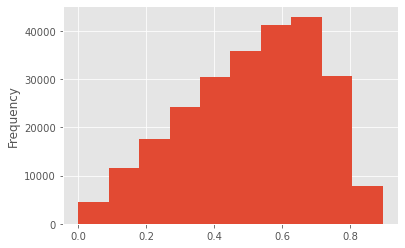

In [15]:
# Plotting the distribution to determine what would be the best possible value to impute them with.
application_df['EXT_SOURCE_3'].plot.hist()
plt.show()

In [16]:
#Filling the EXT_SOURCE_3 with 0 representing Unavailable.
application_df['EXT_SOURCE_3'].fillna(0, inplace = True)
application_df['EXT_SOURCE_3'].isnull().sum()

0

In [17]:
#Filling the AMT_REQ_CREDIT_BUREAU's with 0 representing Unavailable.
application_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0, inplace = True)
application_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0, inplace = True)
application_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0, inplace = True)
application_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0, inplace = True)
application_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0, inplace = True)
application_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0, inplace = True)

In [18]:
application_df['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [19]:
#filling the null date with mode as categorical
application_df['NAME_TYPE_SUITE'].fillna(application_df['NAME_TYPE_SUITE'].mode, inplace = True)

In [20]:
#Filling the EXT_SOURCE_3 with 0 representing Unavailable.
application_df['EXT_SOURCE_2'].fillna(0 , inplace = True)

In [21]:
application_df['EXT_SOURCE_2'].isnull().sum()

0

In [22]:
social_circle_df = application_df.iloc[:, 42:46]

In [23]:
social_circle_df.describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

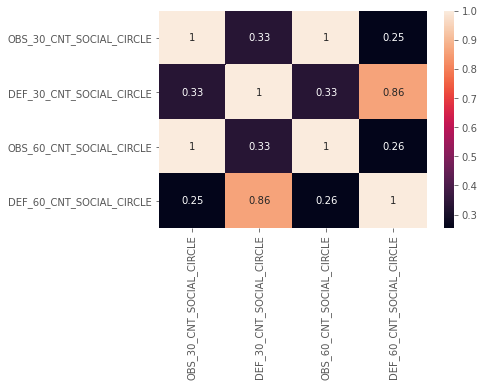

In [24]:
sns.heatmap(social_circle_df.corr(), annot=True)
plt.show()

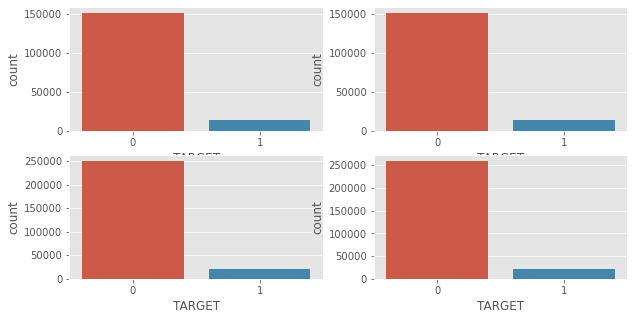

In [25]:
fig, ax= plt.subplots(2,2,figsize=(10,5))
sns.countplot(application_df[application_df.OBS_30_CNT_SOCIAL_CIRCLE == 0]["TARGET"],ax=ax[0][0])
sns.countplot(application_df[application_df.OBS_60_CNT_SOCIAL_CIRCLE == 0]["TARGET"],ax=ax[0][1])
sns.countplot(application_df[application_df.DEF_30_CNT_SOCIAL_CIRCLE == 0]["TARGET"],ax=ax[1][0])
sns.countplot(application_df[application_df.DEF_60_CNT_SOCIAL_CIRCLE == 0]["TARGET"],ax=ax[1][1])
plt.show()

**Comment:**
- DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE are highly correlated
- OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are identical columns

In [26]:
application_df.drop(social_circle_df,axis=1,inplace=True)

In [27]:
#AMT_GOODS_PRICE                 0.090403
#AMT_ANNUITY                     0.003902
#CNT_FAM_MEMBERS                 0.000650
#DAYS_LAST_PHONE_CHANGE          0.000325

# As Seen very small percentage of Data missing so filled in with 0 representing Unknown

In [28]:
application_df['AMT_GOODS_PRICE'].fillna(0 , inplace = True)
application_df['AMT_ANNUITY'].fillna(0 , inplace = True)
application_df['CNT_FAM_MEMBERS'].fillna(0 , inplace = True)
application_df['DAYS_LAST_PHONE_CHANGE'].fillna(0 , inplace = True)

In [29]:
#checking for remailing null values.
application_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

In [30]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

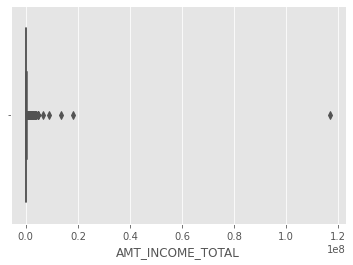

In [31]:
sns.boxplot(application_df.AMT_INCOME_TOTAL)
plt.show()

As we can see, the AMT_INCOME_TOTAL value of 117M is an outlier, and can be dropped as it will affect our analysis.

In [32]:
application_df[application_df.AMT_INCOME_TOTAL>12000000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840       114967       1         Cash loans           F            N   
203693      336147       0         Cash loans           M            Y   
246858      385674       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                Y             1       117000000.0    562491.0   
203693               Y             2        18000090.0    675000.0   
246858               Y             0        13500000.0   1400503.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
12840       26194.5         454500.0   Unaccompanied               Working   
203693      69295.5         675000.0   Unaccompanied  Commercial associate   
246858     130945.5        1368000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840   Secondary / secondary special            Married  House / apartment   
203693  Secondary / secondary special            Married  House / apartment   
246858               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
12840                     0.010643      -12615           -922   
203693                    0.030755      -15704          -4961   
246858                    0.030755      -13551           -280   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
12840             -6762.0            -3643           1               1   
203693            -3338.0            -4728           1               1   
246858            -3953.0            -4972           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
12840                 0                 1           0           0   
203693                0                 1           0           0   
246858                1                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
12840         Laborers              3.0                     2   
203693         Unknown              4.0                     2   
246858         Unknown              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
12840                             2                    TUESDAY   
203693                            2                   THURSDAY   
246858                            2                     SUNDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
12840                        14                           0   
203693                       22                           0   
246858                       12                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
12840                            0                            0   
203693                           0                            0   
246858                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
12840                        0                       0   
203693                       0                       0   
246858                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
12840                         0  Business Entity Type 3      0.113161   
203693                        0  Business Entity Type 3      0.788606   
246858                        0  Business Entity Type 3      0.713507   

        EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
12840       0.145543                     0.0                0   
203693      0.000000                 -1133.0                0   
246858      0.000000                   -13.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
12840                 1                0            

In [33]:
application_df = application_df[application_df['AMT_ANNUITY'] < np.nanpercentile(application_df['AMT_ANNUITY'], 99)]

In [34]:
sns.boxplot(application_df.AMT_ANNUITY)
plt.show()

Some outliers are noticed in annuity amount. Thus, we will remove all entries above 99 percentile.

In [35]:
application_df = application_df[application_df['AMT_ANNUITY'] < np.nanpercentile(application_df['AMT_ANNUITY'], 99)]

In [36]:
sns.boxplot(application_df.AMT_CREDIT)
plt.show()

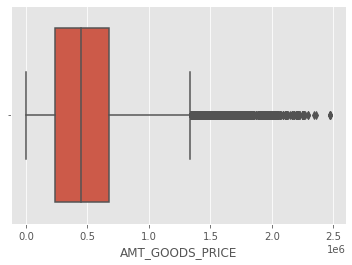

In [37]:
sns.boxplot(application_df.AMT_GOODS_PRICE)
plt.show()

### Checking Data Imbalance

In [38]:
non_default  = application_df[application_df["TARGET"] == 0]
default  = application_df[application_df["TARGET"] == 1]

print("No. of defaulters: ", default.shape[0])
print("No. of non-defaulters: ", non_default.shape[0])
print("Percentage of defaulters: ", default.shape[0]*100/application_df.shape[0])

No. of defaulters:  24617
No. of non-defaulters:  276741
Percentage of defaulters:  8.168689731150327


### Data Imbalance Ratio

Comment: This data is highly imbalanced as number of defaulter is very less in total population. Data Imbalance Ratio

Defaulter : Non-Defaulter = 8 : 92 = 2 : 23

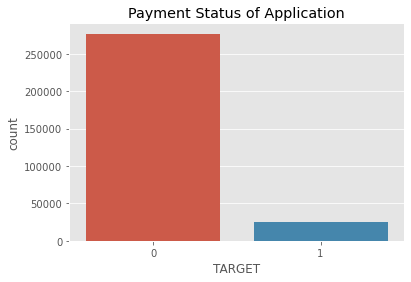

In [39]:
plt.title("Payment Status of Application")
sns.countplot(application_df['TARGET'])
plt.show()

### Segment 1: Documents Submitted by Applicant

Here we are analyzing 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',...,'FLAG_DOCUMENT_21' columns.
Our goal to understand whether trend of document submission and identify impact on TARGET variable(if any).

In [40]:
plt.figure(figsize=(18,12))
sns.heatmap(application_df.iloc[:,43:63],cmap="RdYlGn")
plt.show()

**Comment:**
- The heatmap suggests that all of the documents except Document 3 were not provided by applicants in majority of the cases.
- Hence we can assumen all the document (except document 3) will not contribute towards analyzing the data. Hence all this columns can be dropped.

Checking both defaulter and non-defaulter entries to identify importance of Document 3

In [41]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1, 2, 1, title="Document-3 Submitted")
ax2 = fig.add_subplot(1, 2, 2, title="Document-3 Not Submitted")

sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 0]["TARGET"], ax=ax1)
sns.countplot(application_df[application_df["FLAG_DOCUMENT_3"] == 1]["TARGET"], ax=ax2)

plt.show()

**Comment:**
- FLAG_DOCUMENT_3 is showing similar trend for both non-defaulters and defaulters.
- Hence, this column can be dropped.

In [42]:
application_df.drop(application_df.iloc[:,47:67],axis=1,inplace=True)

### Segment 2: Gender vs Target

In [43]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301358 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   301358 non-null  int64  
 1   TARGET                       301358 non-null  int64  
 2   NAME_CONTRACT_TYPE           301358 non-null  object 
 3   CODE_GENDER                  301358 non-null  object 
 4   FLAG_OWN_CAR                 301358 non-null  object 
 5   FLAG_OWN_REALTY              301358 non-null  object 
 6   CNT_CHILDREN                 301358 non-null  int64  
 7   AMT_INCOME_TOTAL             301358 non-null  float64
 8   AMT_CREDIT                   301358 non-null  float64
 9   AMT_ANNUITY                  301358 non-null  float64
 10  AMT_GOODS_PRICE              301358 non-null  float64
 11  NAME_TYPE_SUITE              301358 non-null  object 
 12  NAME_INCOME_TYPE             301358 non-null  object 
 13 

In [44]:
fig = plt.figure(figsize=(10,5))
sns.countplot(application_df["CODE_GENDER"],hue=application_df["TARGET"])
plt.show()

**Comment**
Females are less likely to fall under the category of Defalters

### Segment 3: ASSET vs TARGET

In [45]:
fig = plt.figure(figsize=(10,5))
sns.countplot(application_df["FLAG_OWN_CAR"],hue=application_df["TARGET"])
plt.show()

**Comment**
Applicants who are car owners are less defaulters

In [46]:
fig = plt.figure(figsize=(10,5))
sns.countplot(application_df["FLAG_OWN_REALTY"],hue=application_df["TARGET"])
plt.show()

**Comment**
Applicants who are house owners are less defaulters

### Segment 4:Housing vs Target

In [47]:
#function to find defaulter percentage under Sub-category
def defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

In [48]:
defaulter_percentage(application_df,'NAME_HOUSING_TYPE')

Value  Percentage of Defaulter
1     Rented apartment                12.432432
2         With parents                11.744281
3  Municipal apartment                 8.643097
5      Co-op apartment                 8.105647
0    House / apartment                 7.890689
4     Office apartment                 6.645817

**Comment**
Applicants Having Rented Apartment or who live with Parents are more likely to fall in Defaulter Category

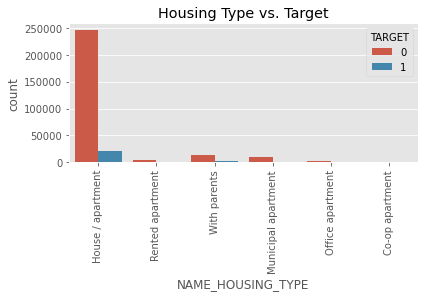

In [49]:
plt.figure()
sns.countplot(application_df["NAME_HOUSING_TYPE"], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Housing Type vs. Target")
plt.show()

### Segment 5: Education and Occupation Info vs Target

In [50]:
defaulter_percentage(application_df,'NAME_INCOME_TYPE')

Value  Percentage of Defaulter
7       Maternity leave                50.000000
4            Unemployed                36.363636
0               Working                 9.667378
2  Commercial associate                 7.641763
1         State servant                 5.854557
3             Pensioner                 5.426939
5               Student                 0.000000
6           Businessman                 0.000000

In [51]:
sns.countplot(application_df["NAME_INCOME_TYPE"],hue=application_df['TARGET'])
plt.xticks(rotation=90)
plt.show()

**Comment:**
- Most of the applicants are working.
- Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter
- Businessman have lowest (0) percentage of Defaulter
However applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.


In [52]:
defaulter_percentage(application_df,'NAME_EDUCATION_TYPE')

Value  Percentage of Defaulter
3                Lower secondary                10.991038
0  Secondary / secondary special                 9.004944
2              Incomplete higher                 8.577676
1               Higher education                 5.461289
4                Academic degree                 1.948052

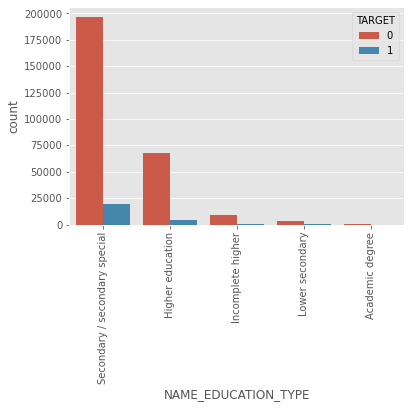

In [53]:
sns.countplot(application_df["NAME_EDUCATION_TYPE"],hue=application_df['TARGET'])
plt.xticks(rotation=90)
plt.show()

**Comment:**
- Applicants having "Lower secondary" education have highest percentage of Defaulter.

In [54]:
defaulter_percentage(application_df, 'OCCUPATION_TYPE')

Value  Percentage of Defaulter
14     Low-skill Laborers                17.195005
5                 Drivers                11.456226
13   Waiters/barmen staff                11.351755
11         Security staff                10.814058
0                Laborers                10.652537
8           Cooking staff                10.495083
6             Sales staff                 9.700784
7          Cleaning staff                 9.648176
15          Realty agents                 8.027211
16            Secretaries                 7.092751
10         Medicine staff                 6.745702
9   Private service staff                 6.721057
4                 Unknown                 6.580990
17               IT staff                 6.547619
18               HR staff                 6.542056
1              Core staff                 6.402552
3                Managers                 6.393492
12  High skill tech staff                 6.196523
2             Accountants                 4.891995

In [55]:
sns.countplot(application_df["OCCUPATION_TYPE"],hue=application_df['TARGET'])
plt.xticks(rotation=90)
plt.show()

**Comment:**
- Low skilled labourers have very high rate of defaulters in comparison to other occupations

### Segment 6 : Region related data

In [57]:
region_df = application_df.iloc[:, 33:39]

In [58]:
region_df['REGION_RATING_CLIENT'] = application_df['REGION_RATING_CLIENT']
region_df['REGION_RATING_CLIENT_W_CITY'] = application_df['REGION_RATING_CLIENT_W_CITY']
region_df["TARGET"] = application_df["TARGET"]

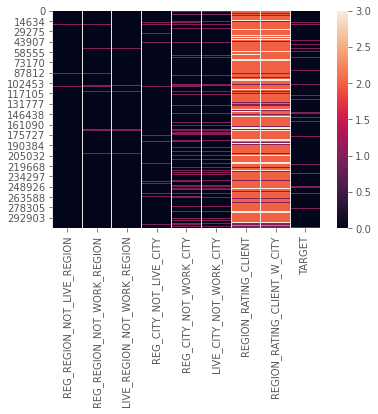

In [59]:
sns.heatmap(region_df)
plt.show()

**Comment:**
- All the features are labeled as 0 and 1
- REG_REGION_NOT_LIVE_REGION mostly contains 0, hence can be removed
- REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION columns are identical, hence one of them can be removed
- REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY columns are identical, hence one of them can be removed

In [60]:
application_df.drop(application_df.iloc[:,33:37],axis=1,inplace=True)

In [61]:
application_df.shape

(301358, 45)

In [62]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']):
    plt.subplot(5, 3, i+1, ylim=(0, 250000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()


**Comment:**
- Highest Applicants have Region rating of 2 have high Default Rate

### Segment 7: Contact Related Info

In [63]:
contact_df = application_df[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE', 'TARGET']]

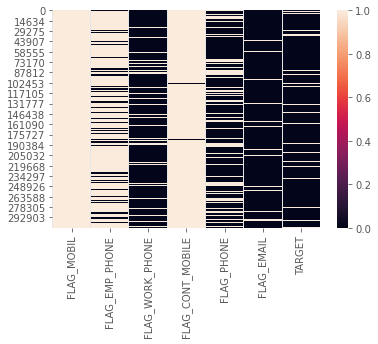

In [64]:
plt.figure()
sns.heatmap(contact_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1))
plt.show()

**Comment**
- FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,DAYS_LAST_PHONE_CHANGE have not been provided and not related.
- Hence Dropped

In [65]:
application_df.drop(['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL'],axis=1,inplace=True)

In [66]:
application_df.shape

(301358, 39)

### Segment 7: Family Related Info

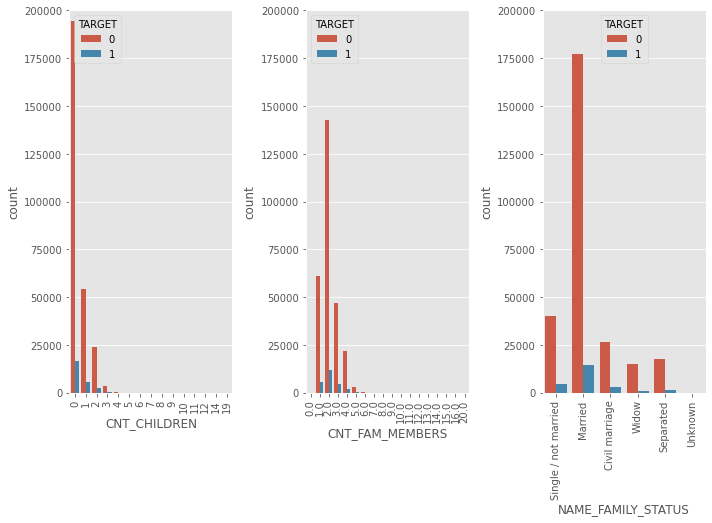

In [67]:
fig=plt.subplots(figsize=(10, 20))

for i, j in enumerate(['CNT_CHILDREN','CNT_FAM_MEMBERS', 'NAME_FAMILY_STATUS']):
    plt.subplot(3, 3, i+1, ylim=(0, 200000))
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(application_df[j], hue=application_df["TARGET"])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [68]:
defaulter_percentage(application_df, 'NAME_FAMILY_STATUS')

Value  Percentage of Defaulter
2        Civil marriage                10.022135
0  Single / not married                 9.894774
4             Separated                 8.261918
1               Married                 7.665956
3                 Widow                 5.845865
5               Unknown                 0.000000

In [69]:
defaulter_percentage(application_df, 'CNT_CHILDREN')

Value  Percentage of Defaulter
9     9.0               100.000000
10   11.0               100.000000
7     6.0                28.571429
4     4.0                13.189448
3     3.0                 9.734028
1     1.0                 9.029458
2     2.0                 8.826223
6     5.0                 8.433735
0     0.0                 7.802964
5     7.0                 0.000000
8     8.0                 0.000000
11   12.0                 0.000000
12   10.0                 0.000000
13   19.0                 0.000000
14   14.0                 0.000000

In [70]:
application_df.CNT_CHILDREN.value_counts()

0     211048
1      59915
2      26206
3       3647
4        417
5         83
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

**Comment:**
- Default rate is highest for Civil Marriage and Single applicants
- Most of the applicants are married (and/or) no children (and/or) 2 family members.
- Applicants with relatively more number of children (and/or) family members have higher default percentage.

- For some of the cases where count children/family members is high, and the default rate is very high or very low.
 This cases cannot be taken as a conclusion as number of applicants having a large family is very low.

### Segment 8: Occupation Info

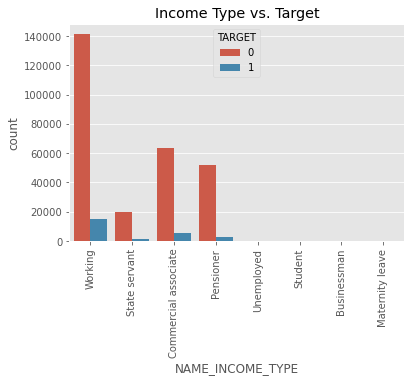

In [71]:
plt.figure()
sns.countplot(application_df['NAME_INCOME_TYPE'], hue=application_df["TARGET"])
plt.xticks(rotation=90)
plt.title("Income Type vs. Target")
plt.show()

In [72]:
defaulter_percentage(application_df,'NAME_INCOME_TYPE')

Value  Percentage of Defaulter
7       Maternity leave                50.000000
4            Unemployed                36.363636
0               Working                 9.667378
2  Commercial associate                 7.641763
1         State servant                 5.854557
3             Pensioner                 5.426939
5               Student                 0.000000
6           Businessman                 0.000000

In [73]:
# Converting DAYS_BIRTH to age
application_df["Age"] = application_df.DAYS_BIRTH//(-365.25) 
application_df[["Age"]].describe()

Age
count  301358.000000
mean       43.396791
std        11.971178
min        20.000000
25%        33.000000
50%        43.000000
75%        53.000000
max        68.000000

In [74]:
# Dropping the column as new column will be used for analysis

application_df.drop("DAYS_BIRTH", inplace=True, axis=1)

In [75]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['Age'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['Age'], ax=ax2)

plt.show()

Comment:

People of age 30 have higher default rate
Default cases are less for applicants more than 40 years old.

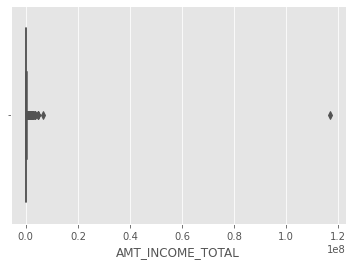

In [76]:
sns.boxplot(application_df['AMT_INCOME_TOTAL'])
plt.show()

In [83]:
# Boxplot is showing the outliers for income and annuity, there are few entries having very large annuity and income than others.
# Considering this entries will mislead the average income of the entire population and further analysis.

# Excluding values outside 99 percentile for AMT_INCOMRE_TOTAL
application_df = application_df[application_df['AMT_INCOME_TOTAL'] < np.nanpercentile(application_df['AMT_INCOME_TOTAL'], 99)]


### Income

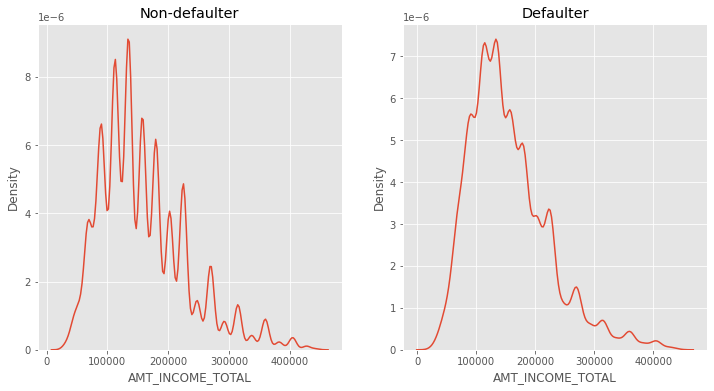

In [84]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['AMT_INCOME_TOTAL'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['AMT_INCOME_TOTAL'], ax=ax2)

plt.show()

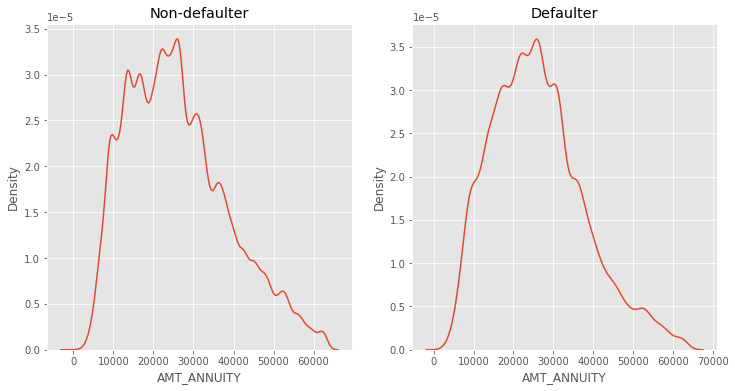

In [80]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.kdeplot(application_df[application_df["TARGET"] == 0]['AMT_ANNUITY'], ax=ax1)
sns.kdeplot(application_df[application_df["TARGET"] == 1]['AMT_ANNUITY'], ax=ax2)

plt.show()

**Comment:**
- For Defaulters and non-defaulters AMT_ANNUITY distribution is similar.

In [87]:
application_df.drop("AMT_ANNUITY",axis=1,inplace=True)

In [81]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title="Non-defaulter")
ax2 = fig.add_subplot(1, 2, 2, title="Defaulter")

sns.scatterplot(application_df[application_df["TARGET"] == 0]['AMT_GOODS_PRICE'], application_df[application_df["TARGET"] == 0]['AMT_CREDIT'], ax=ax1)
sns.scatterplot(application_df[application_df["TARGET"] == 1]['AMT_GOODS_PRICE'], application_df[application_df["TARGET"] == 1]['AMT_CREDIT'], ax=ax2)

plt.tight_layout()
plt.show()

**Comment:**
- AMT_CREDIT and AMT_GOODS_PRICE have linear relation.
- For lower range of AMT_CREDIT and AMT_GOODS_PRICE, amount of defaulters is less than that of non-defaulters 

In [89]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate([ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    if i < 2:
        target=0 # first row for non-defaulters
    else:
        target=1 # second row for defaulters
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(application_df[application_df["TARGET"] == target][j])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [92]:
application_df.drop(['NAME_CONTRACT_TYPE','NAME_TYPE_SUITE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'REGION_POPULATION_RELATIVE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5'],axis=1,inplace=True)

In [129]:
corr0.drop("TARGET",axis=1,inplace=True)

In [95]:
non_default  = application_df[application_df["TARGET"] == 0]
default  = application_df[application_df["TARGET"] == 1]

In [131]:
corr_cols = list(application_df.select_dtypes('int64').columns) + list(application_df.select_dtypes('float').columns)

In [132]:
corr0 = non_default[corr_cols].corr()
corr_df0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr_df0 = corr_df0.unstack().reset_index().dropna(subset = [0])
corr_df0.columns = ['VAR1', 'VAR2', 'CORR_VALUE']
corr_df0['CORR_ABS'] = abs(corr_df0['CORR_VALUE'])
corr_df0.sort_values(by='CORR_ABS', ascending = False, inplace = True)
corr_df0.head(10)

VAR1                    VAR2  CORR_VALUE  CORR_ABS
239              AMT_GOODS_PRICE              AMT_CREDIT    0.985623  0.985623
119  REGION_RATING_CLIENT_W_CITY    REGION_RATING_CLIENT    0.950087  0.950087
268              CNT_FAM_MEMBERS            CNT_CHILDREN    0.877735  0.877735
159      LIVE_CITY_NOT_WORK_CITY  REG_CITY_NOT_WORK_CITY    0.829969  0.829969
174                          Age           DAYS_EMPLOYED    0.622607  0.622607
238              AMT_GOODS_PRICE        AMT_INCOME_TOTAL    0.375620  0.375620
219                   AMT_CREDIT        AMT_INCOME_TOTAL    0.373539  0.373539
173                          Age            CNT_CHILDREN   -0.339126  0.339126
256            DAYS_REGISTRATION                     Age   -0.334585  0.334585
275              CNT_FAM_MEMBERS                     Age   -0.287916  0.287916

In [133]:
corr0.drop("TARGET",axis=0,inplace=True)

In [141]:
plt.figure(figsize = [20,8])
sns.heatmap(corr0,annot=True,cmap="coolwarm")
plt.show()

In [137]:
corr1 = default[corr_cols].corr()
corr_df1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corr_df1 = corr_df1.unstack().reset_index().dropna(subset = [0])
corr_df1.columns = ['VAR1', 'VAR2', 'CORR_VALUE']
corr_df1['CORR_ABS'] = abs(corr_df1['CORR_VALUE'])
corr_df1.sort_values(by='CORR_ABS', ascending = False, inplace = True)
corr_df1.head(10)

VAR1                    VAR2  CORR_VALUE  CORR_ABS
239              AMT_GOODS_PRICE              AMT_CREDIT    0.981559  0.981559
119  REGION_RATING_CLIENT_W_CITY    REGION_RATING_CLIENT    0.957802  0.957802
268              CNT_FAM_MEMBERS            CNT_CHILDREN    0.884905  0.884905
159      LIVE_CITY_NOT_WORK_CITY  REG_CITY_NOT_WORK_CITY    0.777808  0.777808
174                          Age           DAYS_EMPLOYED    0.578262  0.578262
219                   AMT_CREDIT        AMT_INCOME_TOTAL    0.334248  0.334248
238              AMT_GOODS_PRICE        AMT_INCOME_TOTAL    0.333664  0.333664
256            DAYS_REGISTRATION                     Age   -0.290044  0.290044
173                          Age            CNT_CHILDREN   -0.260278  0.260278
175                          Age         DAYS_ID_PUBLISH   -0.254860  0.254860

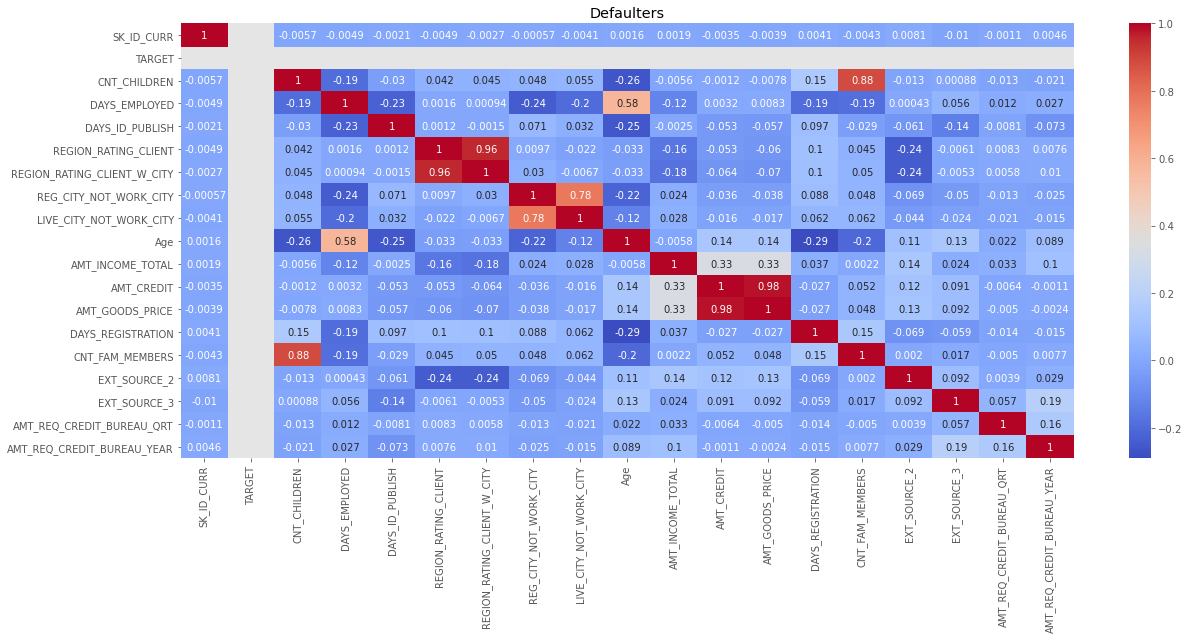

In [139]:
plt.figure(figsize = [20,8])
plt.title("Defaulters")
sns.heatmap(corr1,annot=True,cmap="coolwarm")
plt.show()

### Top 5 important columns

-Family Info: (Important driving features : **'CNT_FAM_MEMBERS', 'CNT_CHILDREN'**)
i. Most of the applicants are married (and/or) no children (and/or) 2 family members.
ii. Applicants with relatively more number of children (and/or) family members have higher default percentage.
(For some of the cases where count children/family members is high, and the default rate is very high or very low.
This cases cannot be considered for analysis as number of applicants having a large family is very low.)

- Education and Occupation Info: (Important driving features :**'NAME_INCOME_TYPE', 'OCCUPATION_TYPE'**)
- Most of the applicants are working.
- Applicants on Maternity Leave and Unemployed has highest percentage of Defaulter
- Businessman have lowest (0) percentage of Defaulter
However applicants of income type('Unemployed', 'Student', 'Businessman', 'Maternity leave') are very few in the dataset to contribute in the analysis.

**CODE_GENDER**
- Female applicants are more than male applicants
- Defauter percentage is higher for male applicants
- XNA values can be replaced with "Unknown"

**DAYS_BIRTH**
- A derived column 'Age' from this gave useful information.
- People of age 25-35 have higher default rate
- Default cases are less for applicants more than 40 years old.

**'EXT_SOURCE_1' and 'EXT_SOURCE_3'** have very different distribution for defaulters and non-defaulters. This can be important features.